In [2]:
import gdown
url= 'https://drive.google.com/file/d/1Ab-kNzzIlBPHAp34O7Jv5_mVVFUe_bGN/view?usp=drive_link'
output= 'response.json'
gdown.download(url, output, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1Ab-kNzzIlBPHAp34O7Jv5_mVVFUe_bGN
To: /content/response.json
100%|██████████| 7.55M/7.55M [00:00<00:00, 34.4MB/s]


'response.json'

# Carga del conjunto de datos y exploracion utilizando las librerias de python

In [3]:
import pandas as pd
import json

# Load the JSON data, handling potential errors
try:
    with open('response.json', 'r') as f:
        data = json.load(f)
except FileNotFoundError:
    print("File 'response.json' not found. Make sure the file exists and the path is correct.")
except json.JSONDecodeError:
    print("Invalid JSON format in 'response.json'. Check the file's contents.")
else:
    # Check lengths of lists in the data
    lengths = [len(v) for v in data.values() if isinstance(v, list)]
    if len(set(lengths)) > 1:
        print("Error: Lists in the JSON data have different lengths. Cannot create a DataFrame.")
        # Optionally, print the lengths to identify the issue
        print("Lengths of lists:", lengths)
    else:
        df = pd.DataFrame(data)
        print(df.head())

Error: Lists in the JSON data have different lengths. Cannot create a DataFrame.
Lengths of lists: [138, 12631]


In [4]:
import pandas as pd
import json

# Load the JSON file
with open('response.json', 'r') as f:
    data = json.load(f)

# Normalize the 'gral' section of the data (adjust 'gral' if it's a different key)
df_gral = pd.json_normalize(data['gral'])

# Now you have DataFrames with consistent column lengths
print(df_gral.head())
print(df_gral.info())

   object                      from                        to mins  velmax  \
0    3700  2024-06-04T03:00:00.000Z  2024-06-11T20:42:43.144Z    0       0   

  type dvcType    _v objType                              hash   kmRec  \
0  can     BCE  next       3  c3d7477d6b03120faead176ef262a0e5  3812.7   

   engOnSec  motionTime  canKmRec  canConsL  canL100Km  maxSpeed.speed  \
0    321628      225360      3968      1350         34              84   

   maxSpeed.date  
0     1717683162  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   object          1 non-null      int64  
 1   from            1 non-null      object 
 2   to              1 non-null      object 
 3   mins            1 non-null      object 
 4   velmax          1 non-null      int64  
 5   type            1 non-null      object 
 6   dvcType         1 non-null      object 
 

In [5]:
import polars as pl
df = pl.read_json('response.json')
df.head()

gral,trips,details
struct[17],list[struct[22]],list[struct[16]]
"{3700,""2024-06-04T03:00:00.000Z"",""2024-06-11T20:42:43.144Z"",""0"",0,""can"",""BCE"",""next"",""3"",""c3d7477d6b03120faead176ef262a0e5"",3812.7,321628,225360,{84,1717683162},3968,1350,34}","[{""trip"",1717470008,1717475680,107.6,5672,5182,{81,1717470392},111,24.5,22.1,{null,null},{-28.5927,-62.9566},[{1717470008,-29.396,-62.3945,85,80,320,0.5,true,28.387,""Movimiento"",147,50.0,173955.5,100.0,1727,772598,89,0.155556,0.5,""Ruta Nac 34 452.0-464.0 Km, Malbran, Santiago Del Estero""}, {1717470032,-29.3923,-62.3979,85,79,320,1.1,true,28.404,""Movimiento"",148,64.4,173955.5,100.0,1715,772598,89,0.0888889,1.1,""Ruta Nac 34 452.0-464.0 Km, Malbran, Santiago Del Estero""}, … {1717475678,-28.5927,-62.9566,102,3,318,108.1,true,28.254,""Movimiento"",3,0.0,173980.0,97.6,598,772709,85,0.009722,108.1,""Ruta Nac 34 565.0-573.0 Km, Colonia Dora, Santiago Del Estero""}],null,null,null,null,null,null,null,null,null}, {""parked"",1717475680,1717476568,null,null,null,{null,null},null,null,null,{null,null},{null,null},null,-28.5927,-62.9566,888,""97.6"",772709,""100.0"",[],""Detenido 15 minutos"",""Ruta Nac 34 565.0-573.0 Km, Colonia Dora, Santiago Del Estero""}, … {""trip"",1718135138,1718138548,52.7,3410,3392,{81,1718137322},55,17.5,31.8,{-33.3588,-60.1886},{null,null},[{1718135138,-33.3588,-60.1896,23,9,230,3760.0,true,28.342,""Movimiento"",19,42.4,175288.5,100.0,2128,776511,83,0.490278,0.0,""Av Savio - Ruta Prov 21 0.0-1.5 Km, San Nicolas De Los Arroyos, Buenos Aires""}, {1718135140,-33.3589,-60.1897,23,10,226,3760.1,true,28.342,""Movimiento"",20,25.6,175288.5,100.0,1203,776511,83,0.0,0.1,""Ruta Nac 188 - Av Yrigoyen 1.9-1.9 Km, San Nicolas De Los Arroyos, Buenos Aires""}, … {1718138548,-33.2149,-60.4782,29,78,308,3812.7,true,28.387,""Movimiento"",144,68.4,175305.5,100.0,1671,776566,95,0.0972222,52.7,""Ruta Nac 9 254.2-258.1 Km, Fighiera, Santa Fe""}],null,null,null,null,null,null,null,null,null}]","[{1717470008,-29.396,-62.3945,80,320,28.387,0.5,true,"""",147,173955.5,100.0,1727,772598,89,""Ruta Nac 34 452.0-464.0 Km, Malbran, Santiago Del Estero""}, {1717470032,-29.3923,-62.3979,79,320,28.404,1.1,true,"""",148,173955.5,100.0,1715,772598,89,""Ruta Nac 34 452.0-464.0 Km, Malbran, Santiago Del Estero""}, … {1718138548,-33.2149,-60.4782,78,308,28.387,3812.7,true,"""",144,175305.5,100.0,1671,776566,95,""Ruta Nac 9 254.2-258.1 Km, Fighiera, Santa Fe""}]"


In [6]:
# Create a new DataFrame with only 'from', 'to', and 'kmRec' columns
print(df.columns)

['gral', 'trips', 'details']


In [7]:
import pandas as pd

# Assuming 'data' is the dictionary you want to convert
# If 'data' is nested, you may need to extract the relevant part for DataFrame creation
relevant_data = data['gral']  # Example: Extract data from the 'gral' key

# Convert the relevant part of the dictionary to a DataFrame
df_pd = pd.DataFrame(relevant_data, index=[0])  # Create a single-row DataFrame

# Convert the DataFrame to a CSV file
df_pd.to_csv('data.csv', index=False)  # Set index=False to exclude index column
df_pd.head()

,object,from,to,mins,velmax,type,dvcType,_v,objType,hash,kmRec,engOnSec,motionTime,maxSpeed,canKmRec,canConsL,canL100Km
0,3700,2024-06-04T03:00:00.000Z,2024-06-11T20:42:43.144Z,0,0,can,BCE,next,3,c3d7477d6b03120faead176ef262a0e5,3812.7,321628,225360,NaN,3968,1350,34


In [8]:
import pandas as pd


relevant_datat = data['trips']
df_pdt = pd.DataFrame(relevant_datat)

# Convert the DataFrame to a CSV file
df_pdt.to_csv('data.csv', index=False)
df_pdt.head()

,type,start,end,kmRec,engOnSec,motionTime,maxSpeed,canKmRec,canConsL,canL100Km,...,lat,lng,idleTime,fuelIni,can_mileage,fuelEnd,events,status,dir,from
0,trip,1717470008,1717475680,107.6,5672.0,5182.0,"{'speed': 81, 'date': 1717470392}",111.0,24.5,22.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,parked,1717475680,1717476568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-28.5927,-62.9566,888.0,97.6,772709.0,100.0,[],Detenido 15 minutos,"Ruta Nac 34 565.0-573.0 Km, Colonia Dora, Sant...",NaN
2,trip,1717476568,1717488232,189.1,11664.0,10606.0,"{'speed': 82, 'date': 1717482088}",197.0,48.5,24.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'lat': -28.5927, 'lng': -62.9566}"
3,parked,1717488232,1717499378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-27.6510,-61.8352,946.0,76.8,772906.0,76.0,[],Detenido alrededor de 3 horas,"Sin Nombre 0-0 A 1.40 Km, Roversi, Santiago D...",NaN
4,trip,1717499378,1717499394,0.0,16.0,16.0,"{'speed': 8, 'date': 1717499378}",0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'lat': -27.651, 'lng': -61.8352}"


In [9]:
import pandas as pd


relevant_datad = data['details']  # Example: Extract data from the 'gral' key
df_pdd = pd.DataFrame(relevant_datad)

# Convert the DataFrame to a CSV file
df_pdd.to_csv('data.csv', index=False)
df_pdd.head()

,date,lat,lng,speed,heading,bat,km,engOn,evDesc,wheel_speed,total_fuel,can_fls,can_taho,can_mileage,eng_temp,dir
0,1717470008,-29.3960,-62.3945,80.0,320.0,28.387,0.5,True,,147.0,173955.5,100.0,1727.0,772598.0,89.0,"Ruta Nac 34 452.0-464.0 Km, Malbran, Santiago ..."
1,1717470032,-29.3923,-62.3979,79.0,320.0,28.404,1.1,True,,148.0,173955.5,100.0,1715.0,772598.0,89.0,"Ruta Nac 34 452.0-464.0 Km, Malbran, Santiago ..."
2,1717470056,-29.3885,-62.4014,80.0,320.0,28.360,1.6,True,,147.0,173955.5,100.0,1715.0,772599.0,90.0,"Ruta Nac 34 452.0-464.0 Km, Malbran, Santiago ..."
3,1717470080,-29.3847,-62.4048,79.0,320.0,28.422,2.1,True,,143.0,173955.5,100.0,1703.0,772599.0,90.0,"Ruta Nac 34 452.0-464.0 Km, Malbran, Santiago ..."
4,1717470104,-29.3810,-62.4082,79.0,320.0,28.369,2.7,True,,145.0,173956.0,100.0,1696.0,772600.0,89.0,"Ruta Nac 34 452.0-464.0 Km, Malbran, Santiago ..."


# Exploracion del data set 'details' y limpieza de datos nulos.
En este caso por la cantidad de entradas del data set se opto por la decision

* El data set con el cual se desarrollara el modelo es 'details'. Al ser el mas completo es mas conveniente trabajar con estos datos.
* En este caso en el tratamiento de nulos y por la cantidad de entradas del data set se optó por la decision de borrar los datos faltantes.  
  



In [10]:
df_pdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12631 entries, 0 to 12630
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         12631 non-null  int64  
 1   lat          12627 non-null  float64
 2   lng          12627 non-null  float64
 3   speed        12627 non-null  float64
 4   heading      12627 non-null  float64
 5   bat          12631 non-null  float64
 6   km           12631 non-null  float64
 7   engOn        12631 non-null  bool   
 8   evDesc       12631 non-null  object 
 9   wheel_speed  11961 non-null  float64
 10  total_fuel   11961 non-null  float64
 11  can_fls      11961 non-null  float64
 12  can_taho     11961 non-null  float64
 13  can_mileage  11961 non-null  float64
 14  eng_temp     11961 non-null  float64
 15  dir          12631 non-null  object 
dtypes: bool(1), float64(12), int64(1), object(2)
memory usage: 1.5+ MB


In [11]:
df_pdd.describe()

,date,lat,lng,speed,heading,bat,km,wheel_speed,total_fuel,can_fls,can_taho,can_mileage,eng_temp
count,1.263100e+04,12627.000000,12627.000000,12627.000000,12627.000000,12631.000000,12631.000000,11961.000000,11961.000000,11961.000000,11961.000000,11961.000000,11961.000000
mean,1.717785e+09,-29.782109,-61.736061,46.707927,183.735012,28.217171,1922.966590,90.753532,174615.563205,76.117950,1405.293621,774587.465847,90.494942
std,1.923826e+05,2.586951,1.038254,31.277637,101.160607,0.631494,1110.324625,55.216017,403.241835,23.754615,397.408401,1153.903942,8.194888
min,1.717470e+09,-33.446900,-63.887000,0.000000,0.000000,24.859000,0.500000,0.000000,173955.500000,6.000000,535.000000,772598.000000,27.000000
25%,1.717589e+09,-32.262950,-62.523950,12.000000,114.000000,28.325000,1069.000000,34.000000,174292.000000,55.600000,1295.000000,773675.000000,88.000000
50%,1.717804e+09,-29.780500,-61.813500,61.000000,176.000000,28.369000,1838.600000,120.000000,174574.500000,80.000000,1573.000000,774513.000000,94.000000
75%,1.717960e+09,-27.652100,-60.751650,75.000000,282.000000,28.404000,2844.500000,139.000000,174960.500000,100.000000,1664.000000,775548.000000,95.000000
max,1.718139e+09,-25.408700,-60.136700,84.000000,358.000000,28.511000,3812.700000,155.000000,175305.500000,100.000000,2311.000000,776566.000000,99.000000


In [12]:
df_pdd.isnull().sum()

,0
date,0
lat,4
lng,4
speed,4
heading,4
bat,0
km,0
engOn,0
evDesc,0
wheel_speed,670


In [13]:
df_limpios = df_pdd.dropna()
df_limpios.isnull().sum()

,0
date,0
lat,0
lng,0
speed,0
heading,0
bat,0
km,0
engOn,0
evDesc,0
wheel_speed,0


In [14]:
variables_estudio = df_limpios[['km', 'speed', 'total_fuel','wheel_speed','can_taho','can_mileage']]

In [15]:
#ver las correlaciones en mi df
# Calcular las correlaciones con algunas columnas seleccionadas
correlation_matrix = variables_estudio.corr()

# Mostrar la matriz de correlaciones
print(correlation_matrix)

                   km     speed  total_fuel  wheel_speed  can_taho  \
km           1.000000 -0.017201    0.999639    -0.015936 -0.036161   
speed       -0.017201  1.000000   -0.016316     0.997441  0.748043   
total_fuel   0.999639 -0.016316    1.000000    -0.015025 -0.036024   
wheel_speed -0.015936  0.997441   -0.015025     1.000000  0.769648   
can_taho    -0.036161  0.748043   -0.036024     0.769648  1.000000   
can_mileage  1.000000 -0.017153    0.999638    -0.015887 -0.036117   

             can_mileage  
km              1.000000  
speed          -0.017153  
total_fuel      0.999638  
wheel_speed    -0.015887  
can_taho       -0.036117  
can_mileage     1.000000  


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Preparacion de los datos para los modelos y entrenamiento de los mismos
* SVM
* Linear Regression

In [20]:
features = ['km', 'speed', 'wheel_speed', 'can_taho']
target = 'total_fuel'

# Dividir los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(variables_estudio[features], variables_estudio[target], test_size=0.3, random_state=42)


# Modelo Regresion Lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Modelo Support Vector Machine model
svr = SVR()
svr.fit(X_train, y_train)

# Predicciones
y_pred_lin = lin_reg.predict(X_test)
y_pred_svr = svr.predict(X_test)

# Print the results
print("Linear Regression:")
print(f"Predicted fuel consumption: {y_pred_lin}")
print("Actual fuel consumption:", y_test.tolist())

print("\nSupport Vector Machine:")
print(f"Predicted fuel consumption: {y_pred_svr}")
print("Actual fuel consumption:", y_test.tolist())

Linear Regression:
Predicted fuel consumption: [174341.76359452 175100.1848698  174863.22523796 ... 174317.19094586
 175133.42284835 174572.56650973]
Actual fuel consumption: [174333.5, 175107.0, 174884.5, 175192.0, 175295.0, 175129.0, 174457.5, 174513.0, 174642.5, 174314.0, 174852.0, 175235.5, 175305.5, 174794.5, 174841.5, 174361.0, 174444.5, 174369.0, 174000.0, 174478.5, 174147.5, 175242.5, 174124.5, 175279.0, 174058.5, 174032.0, 174357.5, 175144.5, 174622.5, 175084.0, 175034.5, 175117.5, 174844.5, 174058.0, 174024.5, 174122.0, 175248.0, 174867.5, 174293.0, 174023.5, 174513.0, 174447.5, 174331.5, 174112.0, 174304.5, 174439.5, 174752.0, 175212.0, 174100.0, 174474.0, 173975.5, 174613.5, 174002.5, 174752.0, 174376.5, 175147.0, 174800.0, 175296.0, 174823.0, 174805.5, 174680.0, 174571.5, 174345.0, 174118.0, 174159.5, 174446.0, 174962.5, 174432.5, 174802.0, 174606.0, 174028.0, 174640.5, 175101.0, 174127.0, 175194.0, 175044.5, 174347.5, 173963.5, 174222.5, 174307.5, 174345.0, 174436.5, 1739

# Visualizacion de los modelos

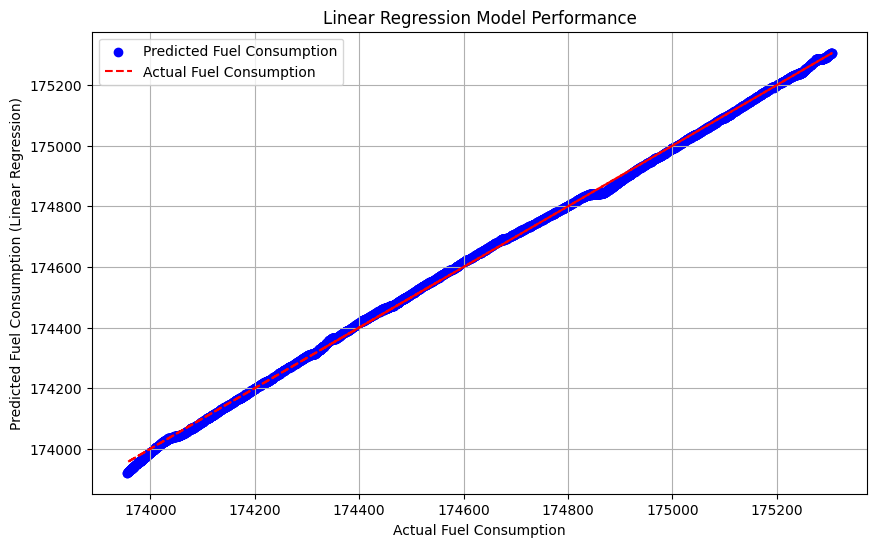

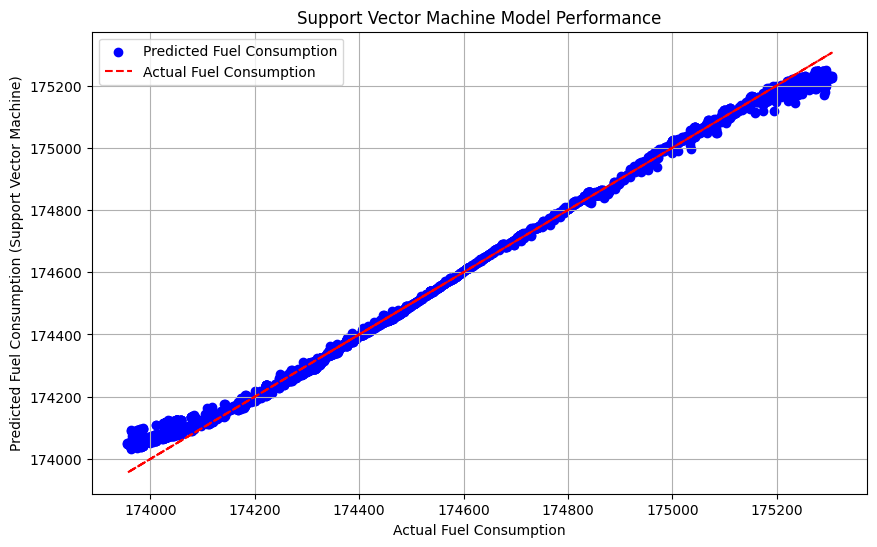

In [21]:
# Plot actual vs prediccion de consumo de combustible por el modelo de Regresion Lineal
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lin, color='blue', label='Predicted Fuel Consumption')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Actual Fuel Consumption')
plt.xlabel('Actual Fuel Consumption')
plt.ylabel('Predicted Fuel Consumption (Linear Regression)')
plt.title('Linear Regression Model Performance')
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs  prediccion de consumo de combustible por el modelo support vector machine
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='blue', label='Predicted Fuel Consumption')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Actual Fuel Consumption')
plt.xlabel('Actual Fuel Consumption')
plt.ylabel('Predicted Fuel Consumption (Support Vector Machine)')
plt.title('Support Vector Machine Model Performance')
plt.legend()
plt.grid(True)
plt.show()

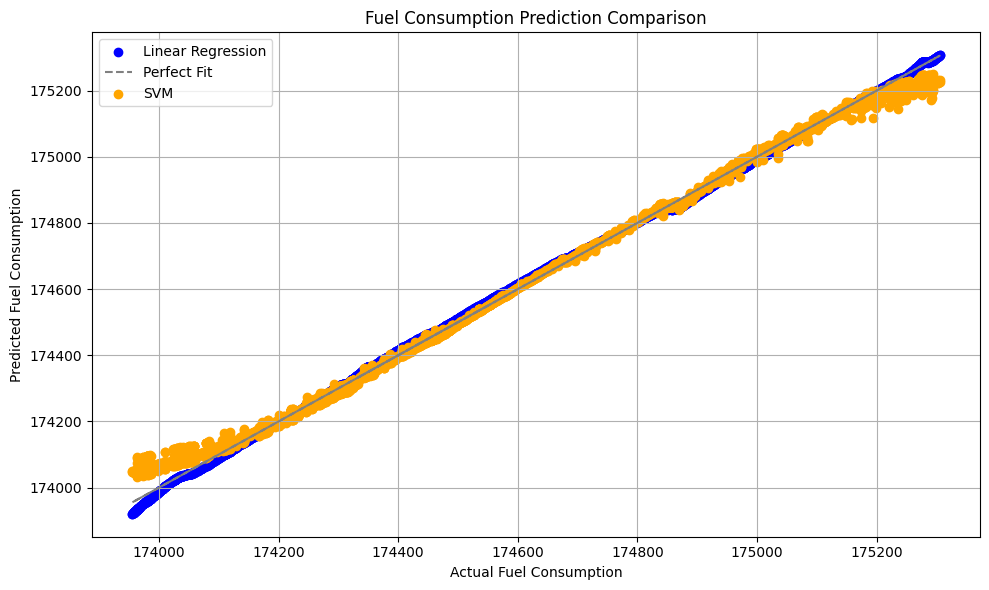

In [18]:
import matplotlib.pyplot as plt
import numpy as np


y_true = y_test  # Actual consumo de combustible
y_pred_linear = lin_reg.predict(X_test)
y_pred_svm = y_pred_svr

# Create the plot
plt.figure(figsize=(10, 6))

# Plot linear regression results
plt.scatter(y_true, y_pred_linear, label='Linear Regression', color='blue')
plt.plot(y_true, y_true, linestyle='--', color='gray', label='Perfect Fit')  # Add a reference line for perfect fit

# Plot SVM results
plt.scatter(y_true, y_pred_svm, label='SVM', color='orange')

# Set labels and title
plt.xlabel('Actual Fuel Consumption')
plt.ylabel('Predicted Fuel Consumption')
plt.title('Fuel Consumption Prediction Comparison')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


# Evaluacion del modelo con sus metricas
MSE (Error Cuadrático Medio) = 119.847: Este valor indica que, en promedio, las predicciones del modelo de Regresión Lineal se desvían del valor real en aproximadamente 119.85 unidades al cuadrado.
MAE (Error Absoluto Medio) = 9.010: Este valor nos dice que, en promedio, las predicciones del modelo se desvían del valor real en 9.01 unidades.
R-squared = 0.99925: Este valor cercano a 1 indica que el modelo explica casi el 99.92% de la variabilidad en los datos. Es decir, el modelo se ajusta muy bien a los datos y hace predicciones muy precisas
El modelo SVM, en este caso, no parece estar funcionando tan bien como el modelo de Regresión Lineal. A pesar de que el R-squared sigue siendo alto, el MSE y MAE significativamente mayores indican que las predicciones del SVM son menos precisas y confiables.

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ... (tu código existente con la creación de los modelos y las predicciones)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(variables_estudio[features], variables_estudio[target], test_size=0.3, random_state=42)


# Calcular métricas para el modelo de regresión lineal
mse_linear = mean_squared_error(y_test, y_pred_lin)
mae_linear = mean_absolute_error(y_test, y_pred_lin)
r2_linear = r2_score(y_test, y_pred_lin)

print("Regresión Lineal:")
print("MSE:", mse_linear)
print("MAE:", mae_linear)
print("R-squared:", r2_linear)

# Calcular métricas para el modelo SVM
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("SVM:")
print("MSE:", mse_svr)
print("MAE:", mae_svr)
print("R-squared:", r2_svr)

Regresión Lineal:
MSE: 119.84720563518675
MAE: 9.010569407354641
R-squared: 0.9992522161841527
SVM:
MSE: 910.7055285303109
MAE: 18.728702053775173
R-squared: 0.9943176743118183
